# Part 2. Data Cleaning
#### 1. Data Cleaning and Wrangling
    1. Check missing data
    2. Check data type for each column to make sure setup correctly
    3. Drop columns if needed
    4. Feature Engineering 
  

In [21]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#  Load csv file for August 
df = pd.read_csv('2020-08.csv')

# View dataframe
df.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (15,16,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,...,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,possibly_sensitive,extended_entities,quoted_status,withheld_in_countries
0,0,2020-08-12 23:59:54+00:00,1293698760506318850,1293698760506318848,"RT @RealJamesWoods: This is our last stand, fo...",False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-08-12 23:59:54+00:00,1293698760615354369,1293698760615354368,"@JoeBiden @KamalaHarris Water, air, have neve...",False,"[24, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.293658e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-08-12 23:59:54+00:00,1293698760619569153,1293698760619569152,RT @realDonaldTrump: Good news for Florida! I’...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020-08-12 23:59:54+00:00,1293698760627937281,1293698760627937280,@realDonaldTrump @KamalaHarris You are so fuck...,False,"[31, 51]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.293511e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020-08-12 23:59:54+00:00,1293698760703320064,1293698760703320064,RT @Navy_Lady_45: Comcast has banned Laura Loo...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,False,en,1.293123e+18,1.293123e+18,"{'url': 'https://t.co/qdhb5n762w', 'expanded':...",NaN,NaN,NaN,NaN


In [23]:
# View the size of the dataframes before sampling and after sampling
print('Shape of df:', df.shape)

Shape of df: (173808, 33)


In [24]:
# Check to make sure all data types are correct
# view all column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173808 entries, 0 to 173807
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 173808 non-null  int64  
 1   created_at                 173808 non-null  object 
 2   id                         173808 non-null  int64  
 3   id_str                     173808 non-null  int64  
 4   full_text                  173808 non-null  object 
 5   truncated                  173808 non-null  bool   
 6   display_text_range         173808 non-null  object 
 7   entities                   173808 non-null  object 
 8   source                     173805 non-null  object 
 9   in_reply_to_status_id      48335 non-null   float64
 10  in_reply_to_status_id_str  48335 non-null   float64
 11  in_reply_to_user_id        51463 non-null   float64
 12  in_reply_to_user_id_str    51463 non-null   float64
 13  in_reply_to_screen_name    51

In [25]:
# created_at needs to change from object to datetime
import datetime

df['created_at'] = pd.to_datetime(df['created_at'])

In [26]:
df.head()

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,...,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,possibly_sensitive,extended_entities,quoted_status,withheld_in_countries
0,0,2020-08-12 23:59:54+00:00,1293698760506318850,1293698760506318848,"RT @RealJamesWoods: This is our last stand, fo...",False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-08-12 23:59:54+00:00,1293698760615354369,1293698760615354368,"@JoeBiden @KamalaHarris Water, air, have neve...",False,"[24, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.293658e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-08-12 23:59:54+00:00,1293698760619569153,1293698760619569152,RT @realDonaldTrump: Good news for Florida! I’...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020-08-12 23:59:54+00:00,1293698760627937281,1293698760627937280,@realDonaldTrump @KamalaHarris You are so fuck...,False,"[31, 51]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.293511e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020-08-12 23:59:54+00:00,1293698760703320064,1293698760703320064,RT @Navy_Lady_45: Comcast has banned Laura Loo...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,False,en,1.293123e+18,1.293123e+18,"{'url': 'https://t.co/qdhb5n762w', 'expanded':...",NaN,NaN,NaN,NaN


In [27]:
# Drop columns that do not plan to use
df = df.drop(columns = ['Unnamed: 0','id_str', 'truncated', 'display_text_range', 'in_reply_to_screen_name', 'geo', 'coordinates', 'contributors', 'is_quote_status', 'favorite_count', 'favorited','quoted_status_id', 'place','quoted_status_id_str', 'quoted_status_permalink', 'extended_entities', 'possibly_sensitive', 'quoted_status', 'withheld_in_countries'], axis = 1)
df.head()

,created_at,id,full_text,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,user,retweeted_status,retweet_count,retweeted,lang
0,2020-08-12 23:59:54+00:00,1293698760506318850,"RT @RealJamesWoods: This is our last stand, fo...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"{'id': 276115813, 'id_str': '276115813', 'name...",{'created_at': 'Wed Aug 12 23:57:19 +0000 2020...,69511,False,en
1,2020-08-12 23:59:54+00:00,1293698760615354369,"@JoeBiden @KamalaHarris Water, air, have neve...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.293658e+18,1.293658e+18,939091.0,939091.0,"{'id': 1010207287284203520, 'id_str': '1010207...",NaN,0,False,en
2,2020-08-12 23:59:54+00:00,1293698760619569153,RT @realDonaldTrump: Good news for Florida! I’...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,NaN,"{'id': 239098890, 'id_str': '239098890', 'name...",{'created_at': 'Wed Aug 12 18:44:01 +0000 2020...,9160,False,en
3,2020-08-12 23:59:54+00:00,1293698760627937281,@realDonaldTrump @KamalaHarris You are so fuck...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.293511e+18,1.293511e+18,25073877.0,25073877.0,"{'id': 14420417, 'id_str': '14420417', 'name':...",NaN,0,False,en
4,2020-08-12 23:59:54+00:00,1293698760703320064,RT @Navy_Lady_45: Comcast has banned Laura Loo...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,"{'id': 435525229, 'id_str': '435525229', 'name...",{'created_at': 'Tue Aug 11 12:33:05 +0000 2020...,395,False,en


In [28]:
# Check missing values
df.isna().sum()

created_at                        0
id                                0
full_text                         0
entities                          0
source                            3
in_reply_to_status_id        125473
in_reply_to_status_id_str    125473
in_reply_to_user_id          122345
in_reply_to_user_id_str      122345
user                              0
retweeted_status              60826
retweet_count                     0
retweeted                         0
lang                              0
dtype: int64

Missing values for retweeted status makes sense. A missing value for retweeted status means that this tweet is a original tweet or a reply.

### Handling different languages in tweets

In [29]:
# show all twitter languages and the number of counts for each one
lang = df['lang'].groupby(df['lang']).count()

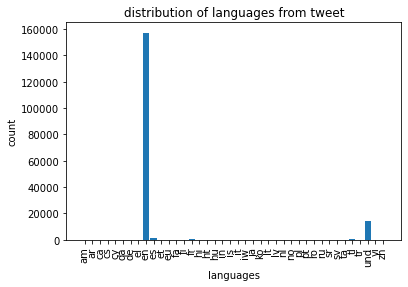

In [30]:
plt.figure()
plt.bar(lang.index, lang.values)
plt.xticks(lang.index, rotation='vertical')
plt.title('distribution of languages from tweet')
plt.xlabel('languages')
plt.ylabel('count')
plt.show()

Check the distrubtion of languages. We can see that the majority  of tweets are in English. I will only include tweets in English. This is  because I  do not speak another  language and do not feel comfortable applying a translation package without being able to check the translation. This creates some bias in the data and would be beneficial to include. This is an example why working with a variety of people with diverse backgrounds is important everywhere but specifically in Data Science. For example, the majority of mexican population in the United States is democratic and therefore we would expect that tweets in spanish will provide positive sentiment towards Biden and negatiive sentiment towards Trump.

In [31]:
# only include english tweets
df = df[df['lang'] == 'en']

# Reset index after removing tweets
df = df.reset_index().drop('index', axis = 1)

In [32]:
# drop language column from dataframe
df.drop('lang', axis = 1, inplace = True)

### Extract month and day of tweet from created at column and create two columns

In [33]:
df['day'] = df['created_at'].dt.day
df['month'] = df['created_at'].dt.month

In [34]:
# The hour is at 0 (12 am) because I selected days with files name _00.txt
df['created_at'].groupby(df['created_at'].dt.hour).count()

created_at
0     157133
23       226
Name: created_at, dtype: int64

### Save clean dataframe as csv

In [16]:
df.to_csv('2020-08_clean.csv', index=False)

### Create a function to apply data cleaning all files for each month

In [16]:
def clean_dataframe(file):

    df = pd.read_csv(file)
    df['created_at'] = pd.to_datetime(df['created_at'])
    
    # Drop columns that do not plan to use
    df = df.drop(columns = ['Unnamed: 0','id_str', 'in_reply_to_status_id_str', 'truncated', 'display_text_range', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'coordinates', 'contributors', 'is_quote_status', 'favorite_count', 'favorited','quoted_status_id', 'place','quoted_status_id_str', 'quoted_status_permalink', 'extended_entities', 'possibly_sensitive', 'quoted_status', 'withheld_in_countries', 'withheld_scope', 'withheld_copyright'], axis = 1)

    # show all twitter languages and the number of counts for each one
    lang = df['lang'].groupby(df['lang']).count()
    # only include english tweets
    df = df[df['lang'] == 'en']
    df.drop('lang', axis = 1, inplace = True)
    
    # Reset index after removing tweets
    df = df.reset_index().drop('index', axis = 1)
     
    df['day'] = df['created_at'].dt.day
    df['month'] = df['created_at'].dt.month
    
    clean_file = file[:-4] + '_clean' + '.csv'
    
    return df.to_csv(clean_file, index=False)



In [20]:
# Use function to clean all files and export as csv

clean_dataframe('2020-10.csv')
clean_dataframe('2020-09.csv')
clean_dataframe('2020-08.csv')
clean_dataframe('2020-07.csv')
clean_dataframe('2020-06.csv')